# Pruning in DT

- it refers to the process of reducing/trimming the size of the tree by removing nodes which do not provide significant predictive power or generalization ability

- to prevent `overfitting`

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

### Load the training data

In [2]:
train = pd.read_csv('census-income.csv')

In [4]:
train.sample(2).T

,3811,3735
age,38,30
workclass,Private,Private
fnlwgt,206535,125762
education,Some-college,Some-college
education-num,10,10
marital-status,Divorced,Married-civ-spouse
occupation,Tech-support,Adm-clerical
relationship,Unmarried,Husband
race,White,White
sex,Female,Male


In [8]:
train['workclass'].unique()

array([0, 1, 2, 'Federal-gov', 3, 7, 4, 5, 6], dtype=object)

In [9]:
train['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [20]:
train.workclass = train.workclass.astype('category').cat.codes
train.education = train.education.astype('category').cat.codes
train['marital-status'] = train['marital-status'].astype('category').cat.codes
train['occupation'] = train['occupation'].astype('category').cat.codes
train['relationship'] = train['relationship'].astype('category').cat.codes
train['race'] = train['race'].astype('category').cat.codes
train['sex'] = train['sex'].astype('category').cat.codes
train['native-country'] = train['native-country'].astype('category').cat.codes
train['annual_income'] = train['annual_income'].astype('category').cat.codes
train.sample(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
27225,58,7,150031,15,10,4,0,1,4,0,0,0,40,39,0
16727,30,2,102821,15,10,2,3,1,4,1,0,0,40,26,0


In [21]:
#encoding workclass, Vehicle_Age and vehicle_Damage columns

### Load the test data

In [6]:
test = pd.read_csv('test_pruning.csv')

In [7]:
#encoding Gender, Vehicle_Age and vehicle_Damage columns for test set

test['Gender'].replace('Male',1,inplace=True)
test['Gender'].replace('Female',0,inplace=True)

test['Vehicle_Damage'].replace('Yes',1,inplace=True)
test['Vehicle_Damage'].replace('No',0,inplace=True)

test['Vehicle_Age'].replace('1-2 Year',0,inplace=True)
test['Vehicle_Age'].replace('< 1 Year',1,inplace=True)
test['Vehicle_Age'].replace('> 2 Years',2,inplace=True)

In [8]:
test.sample(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
55385,436495,0,21,1,50.0,0,1,1,34055.0,160.0,90
55054,436164,0,61,1,28.0,0,0,1,2630.0,26.0,81


In [9]:
Xtrain = train.drop(['id', 'Response'], axis=1)

In [10]:
ytrain = train['Response']

In [11]:
ytrain

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [12]:
Xtest = test.drop('id', axis=1)

In [13]:
Xtrain.shape, ytrain.shape, Xtest.shape

((381109, 10), (381109,), (127037, 10))

In [14]:
len(Xtest)/len(Xtrain)*100

33.33350826141602

### Baseline/Basic Decision Tree Model

In [15]:
### Create training and validation set
X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=45)

In [16]:
X_train.shape, X_val.shape

((304887, 10), (76222, 10))

In [17]:
len(X_val)/len(Xtrain)*100

20.000052478424806

### Training the model

In [18]:
X_train.sample()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
341456,0,31,1,12.0,1,1,0,27917.0,152.0,33


In [19]:
base_model = DecisionTreeClassifier()

In [20]:
base_model_DT = base_model.fit(X_train, y_train)

### Predict the validation set

In [21]:
pred_values = base_model_DT.predict(X_val)

### Evaluate the model performance

In [22]:
print(classification_report(y_val, pred_values))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     66875
           1       0.29      0.31      0.30      9347

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.83     76222



### Pruning in DT

### Iterate `max_depth` till 30

In [23]:
max_depth=[]
acc_gini=[]
acc_entropy=[]


for i in range(1,31):
    
    ### Gini as a criterion
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_val)
    
    acc_gini.append(accuracy_score(y_val, pred))
    
    
    ### Entropy as a criterion
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_val)
    
    acc_entropy.append(accuracy_score(y_val, pred))
    
    max_depth.append(i)

In [24]:
len(acc_entropy), len(acc_gini), len(max_depth)

(30, 30, 30)

### Create a DataFrame --- required for plotting 

- Combined `3 lists` into a `DataFrame`

In [25]:
df_metric = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
                         'acc_entropy':pd.Series(acc_entropy),
                         'max_depth': pd.Series(max_depth)})

In [26]:
df_metric

,acc_gini,acc_entropy,max_depth
0,0.877371,0.877371,1
1,0.877371,0.877371,2
2,0.877371,0.877371,3
3,0.877371,0.877371,4
4,0.877371,0.877371,5
5,0.877371,0.877371,6
6,0.877332,0.877332,7
7,0.877161,0.877266,8
8,0.877017,0.877293,9
9,0.876781,0.876938,10


### Plot `gini` vs `entropy` values against `max_depth`

In [27]:
plt.style.use('fivethirtyeight')

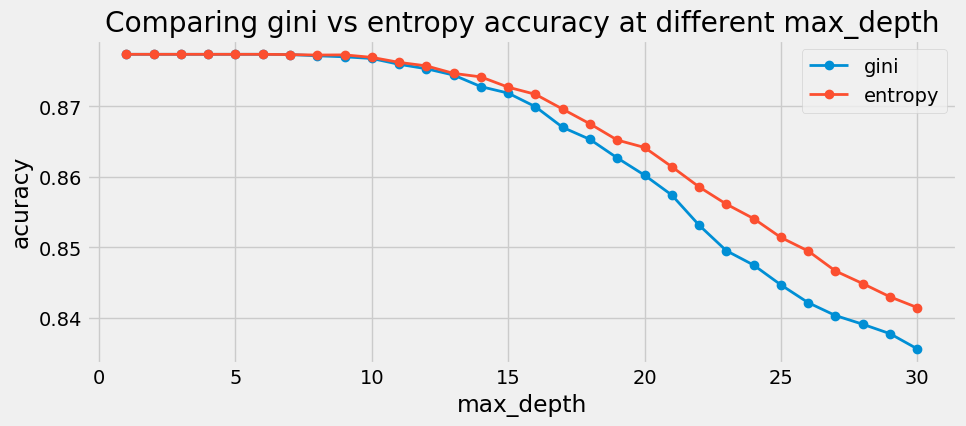

In [28]:
plt.figure(figsize=(10,4))

plt.plot(df_metric['max_depth'], df_metric['acc_gini'], label='gini', linewidth=2, marker='o')
plt.plot(df_metric['max_depth'], df_metric['acc_entropy'], label='entropy', linewidth=2, marker='o')
plt.xlabel('max_depth')
plt.ylabel('acuracy')
plt.title("Comparing gini vs entropy accuracy at different max_depth")
plt.legend()
plt.show()

**the best accuracy score can be achieved at `max_depth` = 1 to 3**

In [29]:
pruned_model = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [30]:
pruned_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
pred_values= pruned_model.predict(X_val)

In [32]:
print(classification_report(y_val, pred_values, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66875
           1       0.00      0.00      0.00      9347

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Accuracy has `improved by ~6%` from the baseline to pruned model

### Task# Perform Hyperparameter Tuning (HPT) and compare the accuracy with baseline and pruned model

### Task# Plot Decision Tree diagram

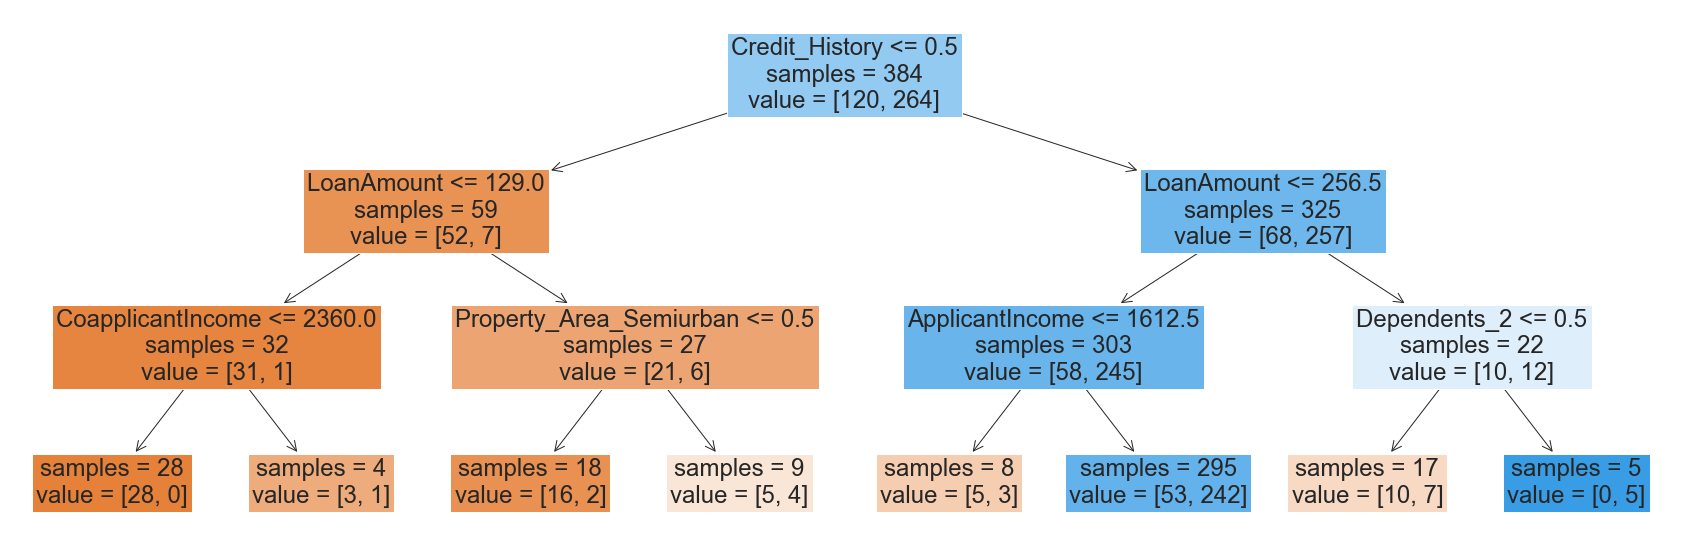

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf=6)

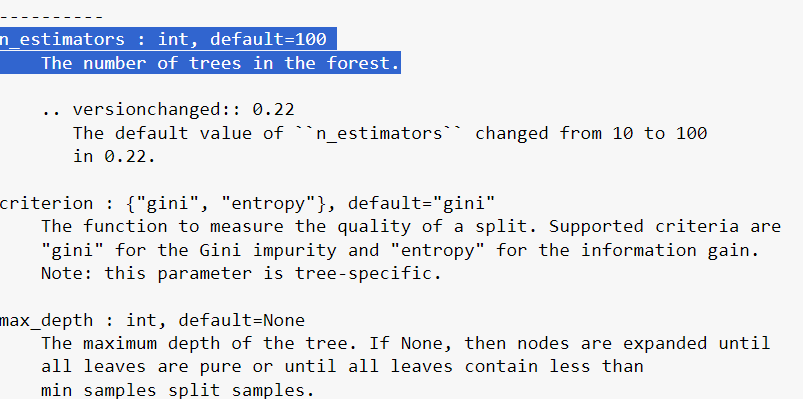

#### Training

In [35]:
rf_clf.fit(X_train, y_train) 

RandomForestClassifier(max_depth=3, min_samples_leaf=6, n_estimators=1000)

#### Validation/Testing/Validation

In [36]:
pred_values_rf= rf_clf.predict(X_val)

#### Performance Report

In [37]:
print(classification_report(y_val, pred_values_rf, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66875
           1       0.00      0.00      0.00      9347

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


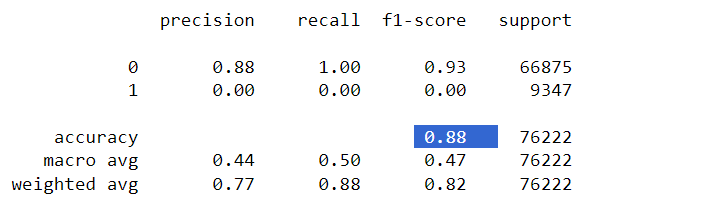

### Task: Apply K-fold CV for accuracy reporting

In [41]:
X_val

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
121272,1,26,1,18.0,0,1,1,2630.0,160.0,279
71971,0,54,1,39.0,1,0,0,38931.0,26.0,71
166692,1,50,1,15.0,0,0,0,33901.0,26.0,164
38230,1,35,1,28.0,0,0,1,37714.0,154.0,22
61548,1,24,1,46.0,1,1,0,19688.0,152.0,219
...,...,...,...,...,...,...,...,...,...,...
252300,0,28,1,8.0,0,1,1,38722.0,152.0,130
227433,1,27,1,28.0,0,0,1,52215.0,156.0,130
71357,1,75,1,41.0,0,0,1,37161.0,26.0,96
301723,1,50,1,50.0,1,0,0,43651.0,122.0,92


In [42]:
y_val

121272    0
71971     0
166692    0
38230     1
61548     0
         ..
252300    0
227433    0
71357     0
301723    0
4849      0
Name: Response, Length: 76222, dtype: int64

### Q. Find the average rating for all the `Drama` genre

In [40]:
df_imdb.sample(2)

NameError: name 'df_imdb' is not defined